In [3]:
import numpy as np
import math as mt
import random as rd
import permute as pm

In [4]:
# Demonstration
pm.permute(3)[1]
#[pm.calculateFactoradic(idx,4) for idx in range(10)]

[0, 1, 0, 1, 0, 1]

In [5]:
# TODO: Find out pattern behind redundant paths
#     UPDATE: On Hold, since getting permutations does not affect time of the algorithm

perm = pm.permute(4)[0]
for idx, p in enumerate(perm):
    # Its a redundant path iff the last index is smaller than the first
    if  p[-1]==2:
        print("index       ", idx-mt.factorial(3))
        #print("permutation ", p)
        #print("factoradic  ", calculateFactoradic(idx,4))

index        -5
index        -2
index        1
index        4
index        12
index        14


In [16]:
import bruteForce as bf

# Generate adjacency matrix for testing purposes
def genAdjMat(nNodes, symmetric = False): 
    print(nNodes)
    if not symmetric:
        adj_mat = np.array([[float(rd.randint(1,100)) for x in range(nNodes)] for x in range(nNodes)])
        for idx in range(len(adj_mat)):
            adj_mat[idx,idx] = np.inf
    else:
        adj_mat = np.zeros([nNodes,nNodes])
        for idx1 in range(nNodes):
            for idx2 in range(idx1+1,nNodes):
                val = float(rd.randint(1,100))
                adj_mat[idx1,idx2] = val
                adj_mat[idx2,idx1] = val
            adj_mat[idx1,idx1] = np.inf        
    return adj_mat

In [7]:
mat = genAdjMat(5)

print("Adjacency matrix:")
print(mat)  
print()

res = bf.bruteForce(mat)
print("Lowest Cost: ",res[0])
print("With path:   ",res[1])

Adjacency matrix:
[[inf 34. 12. 70. 78.]
 [28. inf 70. 99. 15.]
 [99.  5. inf 69.  2.]
 [86. 34. 88. inf 98.]
 [19. 25. 20. 11. inf]]

Lowest Cost:  [85.]
With path:    [0 2 3 1 4 0]


In [8]:
mat = genAdjMat(7,symmetric=True)

print("Adjacency matrix:")
print(mat)  
print()

res = bf.bruteForce(mat,symmetric=True)
print("Lowest Cost: ",res[0])
print("With path:   ",res[1])

Adjacency matrix:
[[inf 34. 53. 22. 76. 45. 46.]
 [34. inf 91. 96.  6.  2. 80.]
 [53. 91. inf  4.  3. 48. 24.]
 [22. 96.  4. inf 13. 26. 69.]
 [76.  6.  3. 13. inf 44. 70.]
 [45.  2. 48. 26. 44. inf 84.]
 [46. 80. 24. 69. 70. 84. inf]]

Lowest Cost:  [204.]
With path:    [0 1 4 6 2 5 3 0]


In [19]:
# mat = genAdjMat(8,symmetric=True)

# print("Adjacency matrix:")
# print(mat)  
# print()

res = [[[np.median([bf.bruteForce(mat,symmetric=False, timed = True)[2] for q in np.arange(10-(idx-3))]), 
         np.median([bf.bruteForce(mat,symmetric=True,  timed = True)[2] for q in np.arange(10-(idx-3))])] 
        for mat in [genAdjMat(idx,symmetric=True)]][0] 
       for idx in (np.arange(10)+3)] 


3
4
5
6
7
8
9
10
11
12


In [20]:
res

[[0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0009989738464355469, 0.0],
 [0.005988121032714844, 0.0],
 [0.031247854232788086, 0.015643596649169922],
 [0.306254506111145, 0.16406846046447754],
 [2.702930450439453, 1.468642234802246],
 [39.15956473350525, 20.522709846496582],
 [477.2006094455719, 203.60099124908447]]

Text(0,0.5,'Time (in seconds)')

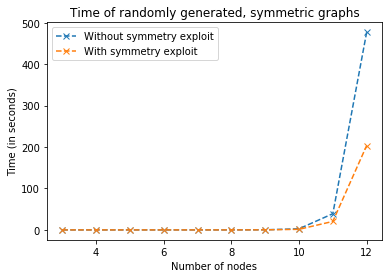

In [33]:
from matplotlib import pyplot as plt
plt.title("Time of randomly generated, symmetric graphs")
plt.plot(np.arange(len(res))+3,np.array(res),'--x')
plt.legend(['Without symmetry exploit','With symmetry exploit'])
plt.xlabel("Number of nodes")
plt.ylabel("Time (in seconds)")